**Load and Inspect the Datasets**

In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_excel('/content/Symptom Classification dataset - 2 -- Train.xlsx')
test_df = pd.read_excel('/content/Symptom Classification dataset - 2 -- Test.xlsx')
val_df = pd.read_excel('/content/Symptom Classification dataset - 2 -- Val.xlsx')

# Display the first few rows of each dataset
print("Training Data Sample:")
print(train_df.head(), "\n")

print("Testing Data Sample:")
print(test_df.head(), "\n")

print("Validation Data Sample:")
print(val_df.head(), "\n")

# Display basic statistics
print("Training Data Info:")
print(train_df.info(), "\n")

print("Testing Data Info:")
print(test_df.info(), "\n")

print("Validation Data Info:")
print(val_df.info(), "\n")


Training Data Sample:
                                                text  labs partition
0  Sally is around the same age, 25 I assume, (ca...     0     Train
1  Every once and a while I will get this over wh...     1     Train
2  Then about 25 minutes later I got a message fr...     0     Train
3  However, today I was sitting at work and for w...     1     Train
4  I was nice, and it got me no where, so I was r...     1     Train 

Testing Data Sample:
                                                text  labs partition
0  I blocked him on FB and then deactivated. One ...   NaN      Test
1  -I'm not doing this for people to MAKE money, ...   NaN      Test
2  one day i broke down into absolute tears and w...   NaN      Test
3  If anything goes wrong, sexually, I want to ce...   NaN      Test
4  I’m currently doing EMDR for my severe anxiety...   NaN      Test 

Validation Data Sample:
                                                text  labs partition
0  She never messaged him back, 

**Data Preprocessing**

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define a comprehensive preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special sequences and non-alphanumeric characters except spaces
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Stop words removal
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens]
    # Rejoin tokens into a single string
    text = ' '.join(tokens)
    return text

# Applying preprocessing to each dataset
train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)
test_df['preprocessed_text'] = test_df['text'].apply(preprocess_text)
val_df['preprocessed_text'] = val_df['text'].apply(preprocess_text)

# Saving the preprocessed data
train_df.to_excel('Preprocessed_Train_v2.xlsx')
test_df.to_excel('Preprocessed_Test_v2.xlsx')
val_df.to_excel('Preprocessed_Val_v2.xlsx')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


 **Exploratory Data Analysis (EDA)**

<ipython-input-6-91a301b7b730>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=colors)


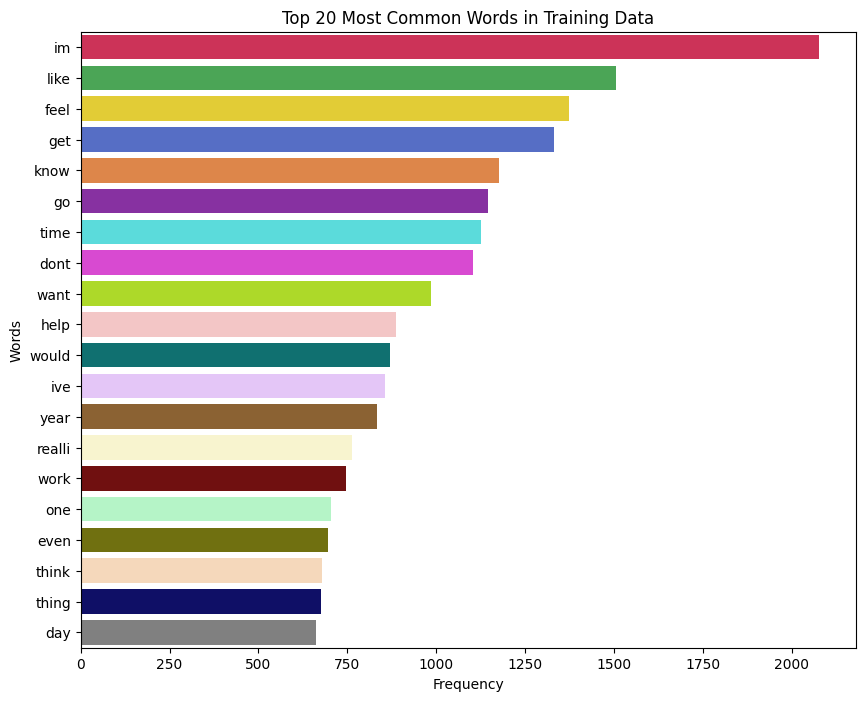

NameError: name 'doc_lengths' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define a custom color palette
colors = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6",
          "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000", "#aaffc3",
          "#808000", "#ffd8b1", "#000075", "#808080"]

# Tokenize the text and count word occurrences
word_counts = Counter(" ".join(train_df['preprocessed_text']).split())

# Most common words
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

# Plotting the most common words
plt.figure(figsize=(10, 8))
sns.barplot(x=list(counts), y=list(words), palette=colors)
plt.title('Top 20 Most Common Words in Training Data')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# creating the histogram for document lengths with the specified color palette
plt.figure(figsize=(10, 6))
sns.histplot(doc_lengths, bins=30, kde=True, color=colors[0])  # Using the first color from the custom palette
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.show()


# Visualize top topics as bar charts
topic_model.visualize_barchart(top_n_topics=15)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/content/Preprocessed_Test_v2.xlsx'
data = pd.read_excel(file_path)

# Helper function to generate and display wordclouds
def generate_wordcloud(text, ngram_range=(1, 1), title="WordCloud"):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit([text])
    bag_of_words = vectorizer.transform([text])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Combine text from all rows into a single string
combined_text = ' '.join(data['preprocessed_text'])  # Replace 'your_column_name' with the actual column name

# Generating and displaying unigram wordcloud
generate_wordcloud(combined_text, ngram_range=(1, 1), title="Unigram WordCloud")

# Generating and displaying bigram wordcloud
generate_wordcloud(combined_text, ngram_range=(2, 2), title="Bigram WordCloud")

# Generating and displaying trigram wordcloud
generate_wordcloud(combined_text, ngram_range=(3, 3), title="Trigram WordCloud")


In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

# Function to filter words based on POS tags
def filter_pos_tags(text, desired_pos_tags):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stopwords.words('english')]
    # POS tagging
    tagged = pos_tag(tokens)
    # Filter words based on POS tags
    filtered_words = ' '.join([word for word, tag in tagged if tag in desired_pos_tags])
    return filtered_words

# POS tags to generate wordclouds for
pos_tags = {
    "Nouns": ["NN", "NNS"],
    "Proper Nouns": ["NNP", "NNPS"],
    "Pronouns": ["PRP", "PRP$", "WP", "WP$"],
    "Verbs": ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    "Auxiliary Verbs": ["MD"],
    "Adjectives": ["JJ", "JJR", "JJS"],
    "Adverbs": ["RB", "RBR", "RBS"],
    "Particles": ["RP"],
    "Interjections": ["UH"]
}

# Generate and display wordclouds for each POS tag
for pos_tag_name, tags in pos_tags.items():
    filtered_text = filter_pos_tags(combined_text, tags)
    generate_wordcloud(filtered_text, title=f"{pos_tag_name} WordCloud")


**Topic Modeling**

Topic 0:
help im work need job money live thank pay url
Topic 1:
time day im got didnt night work sleep like home
Topic 2:
know im dont want think like feel say realli help
Topic 3:
feel im like want thing dont ive know make realli
Topic 4:
year month friend ive time abus ago old start depress


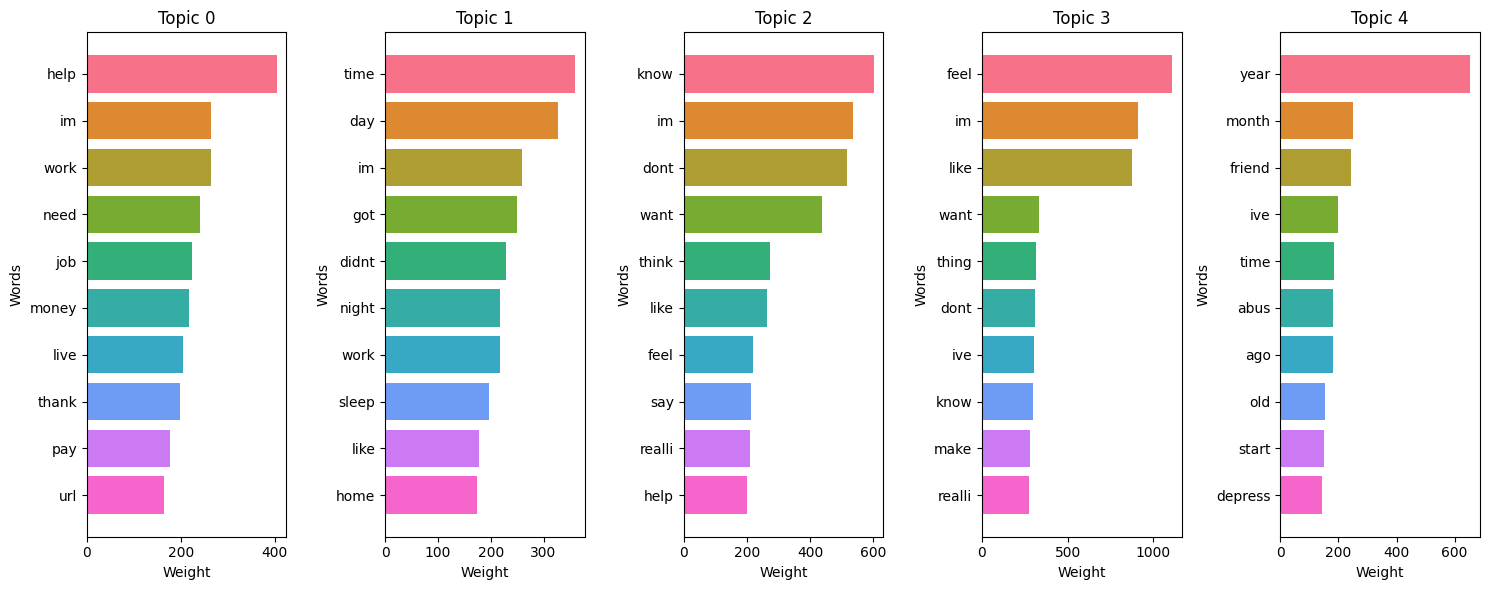

In [ ]:
import seaborn as sns

# Function to display topics and visualize top words
def display_topics(model, feature_names, no_top_words):
    fig, axs = plt.subplots(1, model.n_components, figsize=(15, 6))  # Create subplots

    # Get unique color palettes for each bar chart
    palette_outer = sns.color_palette("husl", model.n_components)

    for topic_idx, (ax, topic) in enumerate(zip(axs, model.components_)):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx}:")
        print(" ".join(top_words))

        # Generate unique color palette for bars within each chart
        palette_inner = sns.color_palette("husl", len(top_words))

        # Visualize top words for the topic
        top_word_weights = [topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        ax.barh(top_words, top_word_weights, color=palette_inner)  # Horizontal bar plot
        ax.set_title(f'Topic {topic_idx}')
        ax.set_xlabel('Weight')
        ax.set_ylabel('Words')
        ax.invert_yaxis()  # Invert y-axis to have the highest weight at the top

        # Set white background for each bar chart
        ax.set_facecolor('white')

    plt.tight_layout()  # Adjust layout
    plt.show()

# Display topics and visualize
display_topics(lda, vectorizer.get_feature_names_out(), 10)


**Training using Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load data from Excel files
train_data_path = '/content/Preprocessed_Train_v2.xlsx'
val_data_path = '/content/Preprocessed_Val_v2.xlsx'
test_data_path = '/content/Preprocessed_Test_v2.xlsx'

train_data = pd.read_excel(train_data_path)
val_data = pd.read_excel(val_data_path)
test_data = pd.read_excel(test_data_path)

# Handle missing values in the text columns
train_data['text'].fillna('', inplace=True)  # Replace NaN with empty strings
val_data['text'].fillna('', inplace=True)    # Replace NaN with empty strings
test_data['text'].fillna('', inplace=True)   # Replace NaN with empty strings

# Prepare feature vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust 'max_features' as needed
X_train = tfidf_vectorizer.fit_transform(train_data['text'])
X_val = tfidf_vectorizer.transform(val_data['text'])
X_test = tfidf_vectorizer.transform(test_data['text'])

# Labels for training and validation
y_train = train_data['labs']
y_val = val_data['labs']

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase 'max_iter' if convergence issues occur
logistic_model.fit(X_train, y_train)

# Predict and evaluate on the training dataset
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate training accuracy
train_report = classification_report(y_train, y_train_pred, output_dict=True)
train_macro_recall = train_report['macro avg']['recall']

# Predict and evaluate on the validation dataset
y_val_pred = logistic_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate validation accuracy
val_report = classification_report(y_val, y_val_pred, output_dict=True)
val_macro_recall = val_report['macro avg']['recall']

# Predict labels for the test dataset
y_test_pred = logistic_model.predict(X_test)

# Optionally save the test predictions to an Excel file
test_predictions = pd.DataFrame({'text': test_data['text'], 'predicted_label': y_test_pred})
test_predictions.to_excel('Test_Dataset_Predictions.xlsx', index=False)

# Create a DataFrame with actual and predicted labels for the validation dataset
val_predictions = pd.DataFrame({
    'text': val_data['text'],
    'actual_label': y_val,
    'predicted_label': y_val_pred
})
val_predictions.to_excel('Validation_Dataset_Predictions.xlsx', index=False)

# Print accuracy and macro-averaged recall
print("Training Accuracy:", train_accuracy)
print("Training Macro-Averaged Recall:", train_macro_recall)
print("Validation Accuracy:", val_accuracy)
print("Validation Macro-Averaged Recall:", val_macro_recall)

Training Accuracy: 0.8980910425844346
Training Macro-Averaged Recall: 0.8969810146280734
Validation Accuracy: 0.8334801762114538
Validation Macro-Averaged Recall: 0.8319327731092437
